## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import dataset

In [2]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
df.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing UCB

In [32]:
import math

In [41]:
N = 1000

In [42]:
d = 10

In [43]:
ads_selected = []

In [44]:
numbers_of_selections = [0] * d

In [45]:
sum_rewards = [0] * d

In [46]:
total_reward = 0

In [47]:
for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selections[i] > 0:
            average_reward = sum_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt((3 / 2) * (math.log(n+1) / numbers_of_selections[i]))
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = df.values[n, ad]
    sum_rewards[ad] += reward
    total_reward += reward

## Visualising the results

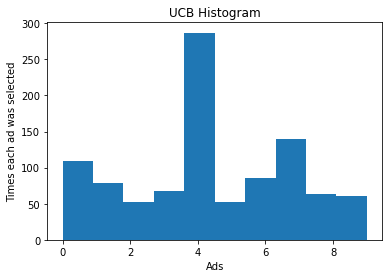

In [48]:
plt.hist(ads_selected)
plt.title('UCB Histogram')
plt.xlabel('Ads')
plt.ylabel('Times each ad was selected')
plt.show()